In [6]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [7]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('BCCD_Dataset/test.csv')
train.head()

,filename,cell_type,xmin,xmax,ymin,ymax
0,BloodImage_00000.jpg,WBC,260,491,177,376
1,BloodImage_00000.jpg,RBC,78,184,336,435
2,BloodImage_00000.jpg,RBC,63,169,237,336
3,BloodImage_00000.jpg,RBC,214,320,362,461
4,BloodImage_00000.jpg,RBC,414,506,352,445


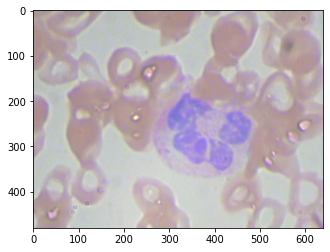

In [8]:
# reading single image using imread function of matplotlib
image = plt.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00000.jpg')
plt.imshow(image)

In [10]:
# Number of unique training images
train['filename'].nunique()

364

In [11]:
# Number of classes
train['cell_type'].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_type, dtype: int64

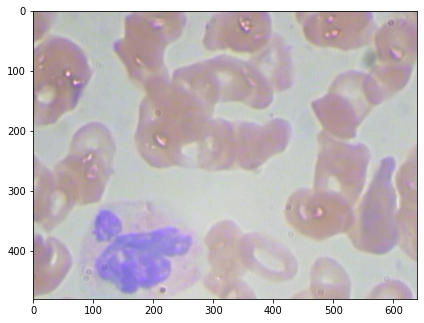

In [16]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('BCCD_Dataset/BCCD/JPEGImages/BloodImage_00001.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.filename == "Image_00001.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)
plt.imshow(image)

### Implementing Faster R-CNN 

In [17]:
data = pd.DataFrame()
data['format'] = train['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'BCCD_Dataset/BCCD/JPEGImages/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [ ]:
#cd keras-frcnn
python train_frcnn.py -o simple -p annotate.txt

In [ ]:
python test_frcnn.py -p testnotate.txt